## VGG16 Training Visualization Notebook

This notebook is used for visualizing the results from training the VGG16 model. It includes plots of the training and validation loss over time for two different training runs: one without pretraining and one with pretraining.

Please note that the training runs data used for generating these plots are not available in the GitHub repository. They are stored locally and accessed for visualization purposes in this notebook.


In [1]:
def summarize_array(array, interval=10):
    summary = "Array Summary:\n"
    summary += "Shape: {}\n".format(array.shape)
    summary += "Data Type: {}\n".format(array.dtype)
    summary += "Min Value: {}\n".format(np.min(array))
    summary += "Max Value: {}\n".format(np.max(array))
    summary += "Selected Values:\n"

    for i in range(0, len(array), interval):
        value = array[i]
        summary += "Index {}: {}\n".format(i, value)

    return summary

train_summary = summarize_array(train_losses)
val_summary = summarize_array(val_losses)

print("Train Losses Summary:")
print(train_summary)
print("Val Losses Summary:")
print(val_summary)

NameError: name 'train_losses' is not defined

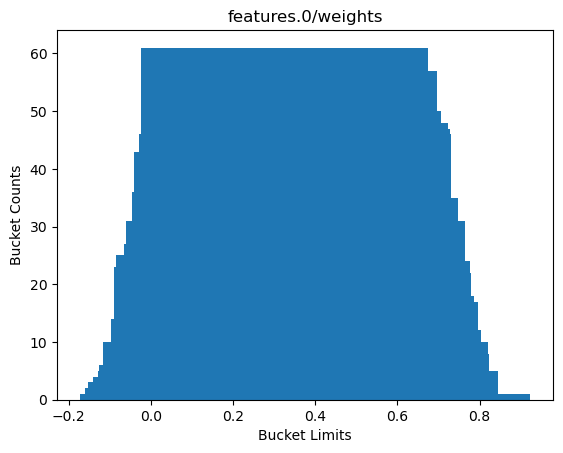

In [ ]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

# Load the TensorBoard event file
event_file = 'finetuning/runs/train_run_6_no_pretraining/events.out.tfevents.1687939903.Kontor.14896.0'
event_acc = EventAccumulator(event_file)
event_acc.Reload()

# Find the desired histogram data
histogram_tag = 'features.0/weights'  # Specify the tag used when adding the histogram
step_numbers, bucket_limits, bucket_counts = [], [], []

for tag in event_acc.Tags()['histograms']:
    if tag == histogram_tag:
        hist_data = event_acc.Histograms(tag)
        for hist in hist_data:
            step_numbers.append(hist.step)
            bucket_limits.append(hist.histogram_value.bucket_limit)
            bucket_counts.append(hist.histogram_value.bucket)

# Plot the histogram
plt.bar(bucket_limits[0], bucket_counts[0], width=0.7, align='edge')
plt.xlabel('Bucket Limits')
plt.ylabel('Bucket Counts')
plt.title(histogram_tag)
plt.show()

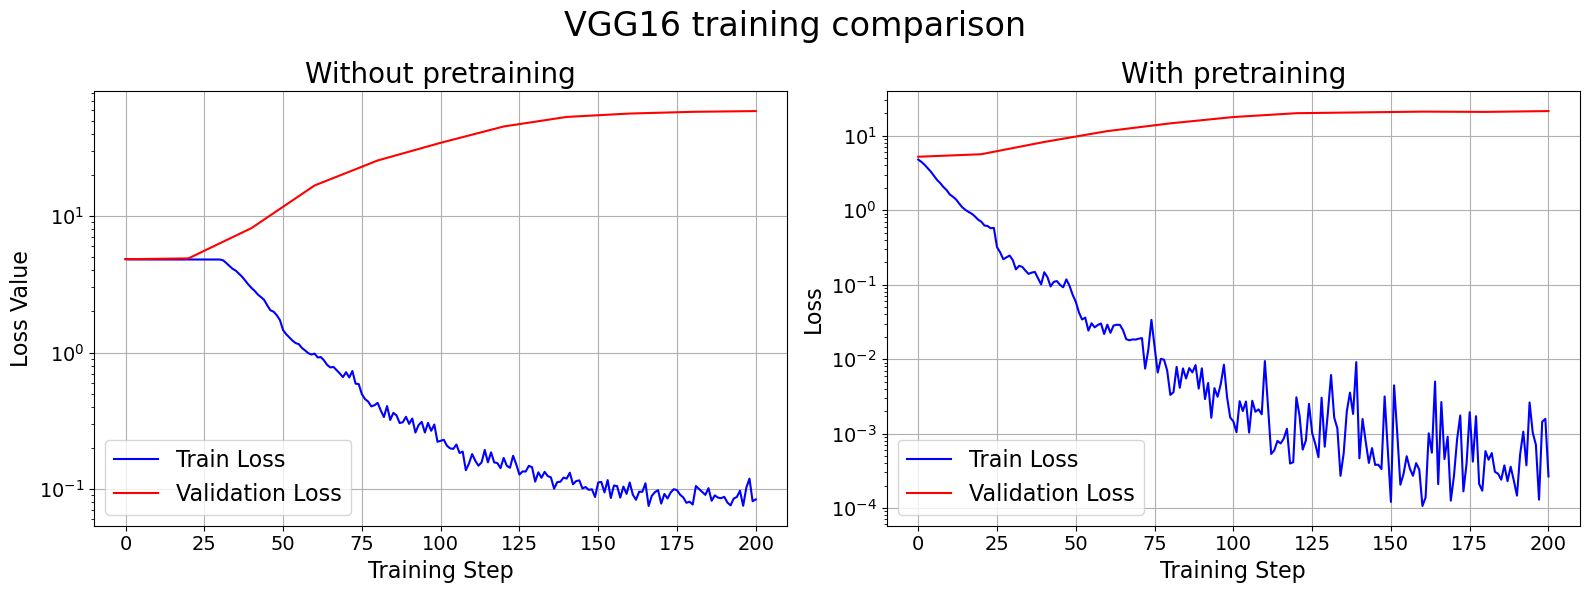

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data for train_run_6_no_pretraining
train_loss_6 = pd.read_csv('finetuning/runs/train_run_6_no_pretraining/train_loss.csv')
val_loss_6 = pd.read_csv('finetuning/runs/train_run_6_no_pretraining/val_loss.csv')

# Read data for train_run_7_pretraining
train_loss_7 = pd.read_csv('finetuning/runs/train_run_7_pretraining/train_loss.csv')
val_loss_7 = pd.read_csv('finetuning/runs/train_run_7_pretraining/val_loss.csv')

# Cap the data at step 200
train_loss_6 = train_loss_6[train_loss_6["Step"] <= 200]
val_loss_6 = val_loss_6[val_loss_6["Step"] <= 200]
train_loss_7 = train_loss_7[train_loss_7["Step"] <= 200]
val_loss_7 = val_loss_7[val_loss_7["Step"] <= 200]

# Create parent figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for train_run_6_no_pretraining
axes[0].plot(train_loss_6["Step"], train_loss_6["Value"], color='blue', label='Train Loss')
axes[0].plot(val_loss_6["Step"], val_loss_6["Value"], color='red', label='Validation Loss')
axes[0].set_title("Without pretraining", fontsize=20)
axes[0].set_xlabel("Training Step", fontsize=16)
axes[0].set_ylabel("Loss Value", fontsize=16)
axes[0].tick_params(labelsize=14)
axes[0].grid(True)
axes[0].set_yscale('log')
axes[0].legend(fontsize=16)

# Plot for train_run_7_pretraining
axes[1].plot(train_loss_7["Step"], train_loss_7["Value"], color='blue', label='Train Loss')
axes[1].plot(val_loss_7["Step"], val_loss_7["Value"], color='red', label='Validation Loss')
axes[1].set_title("With pretraining", fontsize=20)
axes[1].set_xlabel("Training Step", fontsize=16)
axes[1].set_ylabel("Loss", fontsize=16)
axes[1].tick_params(labelsize=14)
axes[1].grid(True)
axes[1].set_yscale('log')
axes[1].legend(fontsize=16)

plt.suptitle("VGG16 training comparison", fontsize=24)
plt.tight_layout()
plt.show()

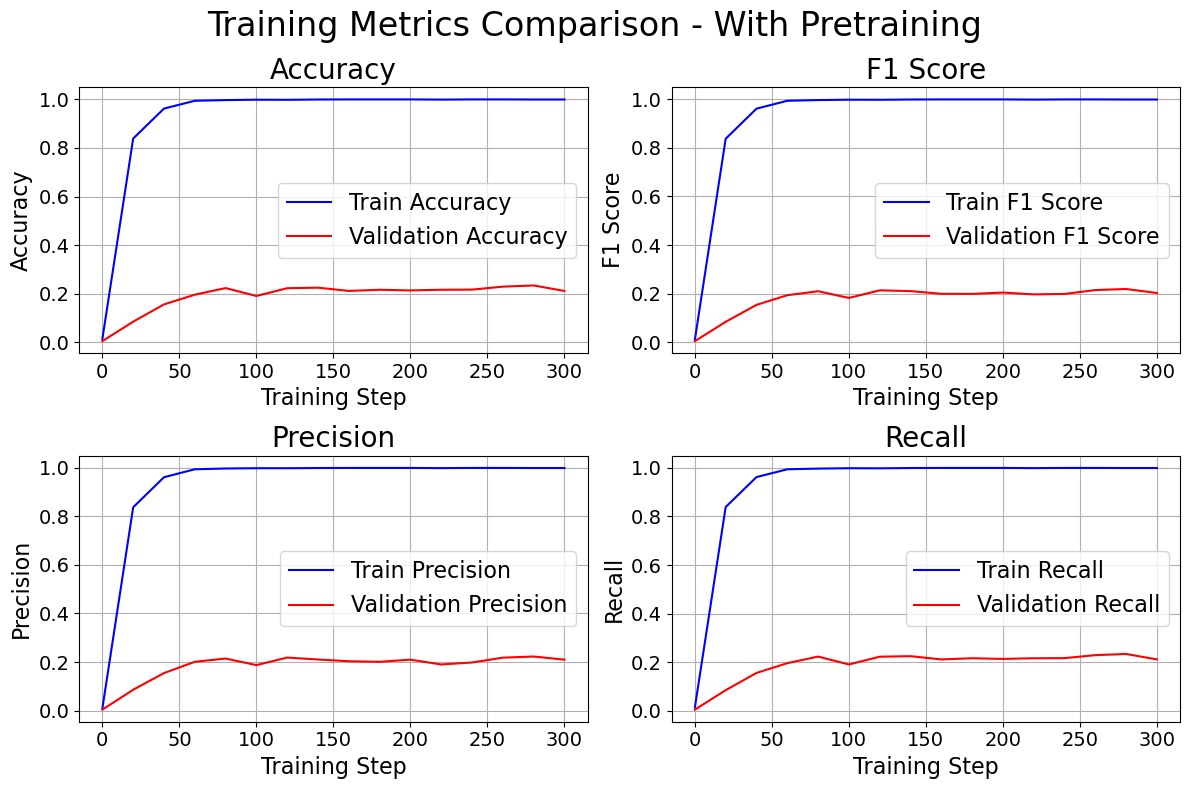

In [10]:
train_accuracy = pd.read_csv('finetuning/runs/train_run_7_pretraining/train_accuracy.csv')
train_f1 = pd.read_csv('finetuning/runs/train_run_7_pretraining/train_f1_score.csv')
train_precision = pd.read_csv('finetuning/runs/train_run_7_pretraining/train_precision.csv')
train_recall = pd.read_csv('finetuning/runs/train_run_7_pretraining/train_recall.csv')

val_accuracy = pd.read_csv('finetuning/runs/train_run_7_pretraining/val_accuracy.csv')
val_f1 = pd.read_csv('finetuning/runs/train_run_7_pretraining/val_f1_score.csv')
val_precision = pd.read_csv('finetuning/runs/train_run_7_pretraining/val_precision.csv')
val_recall = pd.read_csv('finetuning/runs/train_run_7_pretraining/val_recall.csv')

# Create parent figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot for train_accuracy
axes[0, 0].plot(train_accuracy["Step"], train_accuracy["Value"], color='blue', label='Train Accuracy')
axes[0, 0].plot(val_accuracy["Step"], val_accuracy["Value"], color='red', label='Validation Accuracy')
axes[0, 0].set_title("Accuracy", fontsize=20)
axes[0, 0].set_xlabel("Training Step", fontsize=16)
axes[0, 0].set_ylabel("Accuracy", fontsize=16)
axes[0, 0].tick_params(labelsize=14)
axes[0, 0].grid(True)
axes[0, 0].legend(fontsize=16)

# Plot for train_f1
axes[0, 1].plot(train_f1["Step"], train_f1["Value"], color='blue', label='Train F1 Score')
axes[0, 1].plot(val_f1["Step"], val_f1["Value"], color='red', label='Validation F1 Score')
axes[0, 1].set_title("F1 Score", fontsize=20)
axes[0, 1].set_xlabel("Training Step", fontsize=16)
axes[0, 1].set_ylabel("F1 Score", fontsize=16)
axes[0, 1].tick_params(labelsize=14)
axes[0, 1].grid(True)
axes[0, 1].legend(fontsize=16)

# Plot for train_precision
axes[1, 0].plot(train_precision["Step"], train_precision["Value"], color='blue', label='Train Precision')
axes[1, 0].plot(val_precision["Step"], val_precision["Value"], color='red', label='Validation Precision')
axes[1, 0].set_title("Precision", fontsize=20)
axes[1, 0].set_xlabel("Training Step", fontsize=16)
axes[1, 0].set_ylabel("Precision", fontsize=16)
axes[1, 0].tick_params(labelsize=14)
axes[1, 0].grid(True)
axes[1, 0].legend(fontsize=16)

# Plot for train_recall
axes[1, 1].plot(train_recall["Step"], train_recall["Value"], color='blue', label='Train Recall')
axes[1, 1].plot(val_recall["Step"], val_recall["Value"], color='red', label='Validation Recall')
axes[1, 1].set_title("Recall", fontsize=20)
axes[1, 1].set_xlabel("Training Step", fontsize=16)
axes[1, 1].set_ylabel("Recall", fontsize=16)
axes[1, 1].tick_params(labelsize=14)
axes[1, 1].grid(True)
axes[1, 1].legend(fontsize=16)

plt.suptitle("Training Metrics Comparison - With Pretraining", fontsize=24)
plt.tight_layout()
plt.show()
